In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
data = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\airline-passengers.csv")
data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index("Month", inplace= True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data1 = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\airline-passengers.csv")
data1
data1.Month = pd.to_datetime(data1["Month"])
data1.set_index("Month", inplace=True)
data1
plt.figure(figsize=(6,5))
plt.grid()
plt.plot(data1.index, data1["Passengers"], "--", marker = ".")
plt.xlabel("Month")
plt.ylabel("Passengers")


Text(0, 0.5, 'Month')

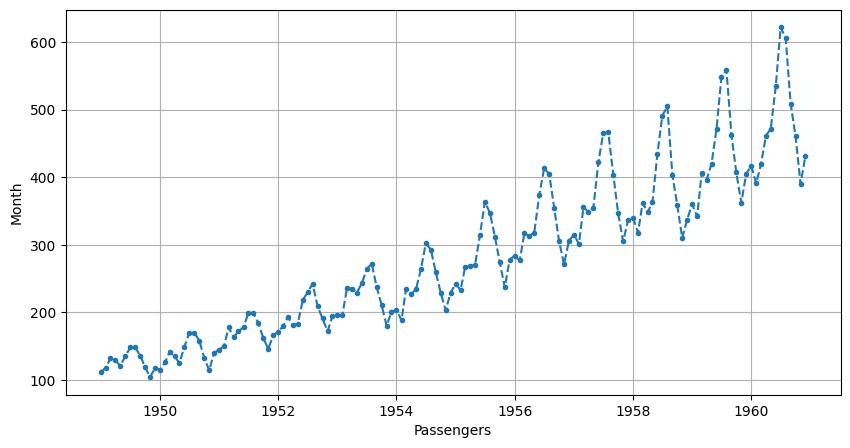

In [40]:
plt.figure(figsize= (10,5))
plt.plot(data.index, data['Passengers'], "--", marker = '.' )
plt.grid()
plt.xlabel("Passengers")
plt.ylabel("Month")

In [67]:
import numpy as np
df = {"name": [22, 23], "ra": [21,11], "da": [12,10]}
d = pd.DataFrame(df)
d["name"] = np.nan
d

,name,ra,da
0,NaN,21,12
1,NaN,11,10


In [73]:
df_copy =  data1.copy()
row = df_copy.sample(frac = 0.1, random_state = 0)
row["Passengers"] = np.nan
df_copy.loc[row.index, "Passengers"] = row["Passengers"]
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [78]:
df_copy_ff = df_copy.fillna(method='ffill')
df_copy_ff.isnull().sum()

# Backward fill
df_copy_bf = df_copy.fillna(method= 'bfill')
df_copy_bf.isnull().sum()

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_7184\357180377.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_ff = df_copy.fillna(method='ffill')
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_7184\357180377.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_bf = df_copy.fillna(method= 'bfill')


Passengers    0
dtype: int64

In [82]:
# Interpolate results
df_copy_if = df_copy.interpolate(method='linear', limit_direction= 'forward')
df_copy_if.isnull().sum()

df_copy_ib =  df_copy.interpolate(method='linear', limit_direction= 'backward')
df_copy_ib.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
# df_copy

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_7184\233195175.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_quarterly = df_copy.resample('3M').mean()


Text(0, 0.5, 'Passengers')

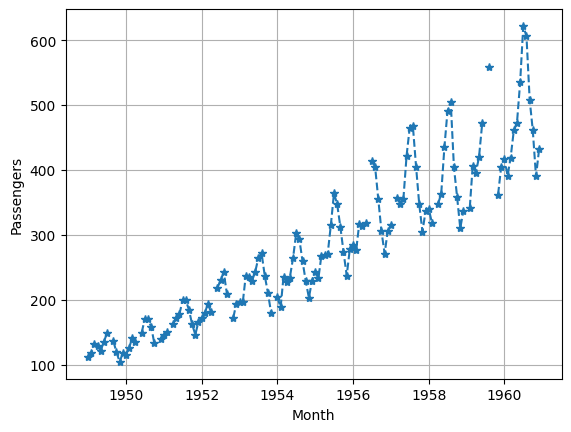

In [95]:
# Downsample
df_quarterly = df_copy.resample('3M').mean()
df_quarterly
plt.plot(df_copy.index, df_copy["Passengers"], "--", marker = "*")
plt.grid()
plt.xlabel("Month")
plt.ylabel("Passengers")

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_7184\418044129.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_quarterly = df_copy.resample('3M').mean()


Text(0, 0.5, 'Passengers')

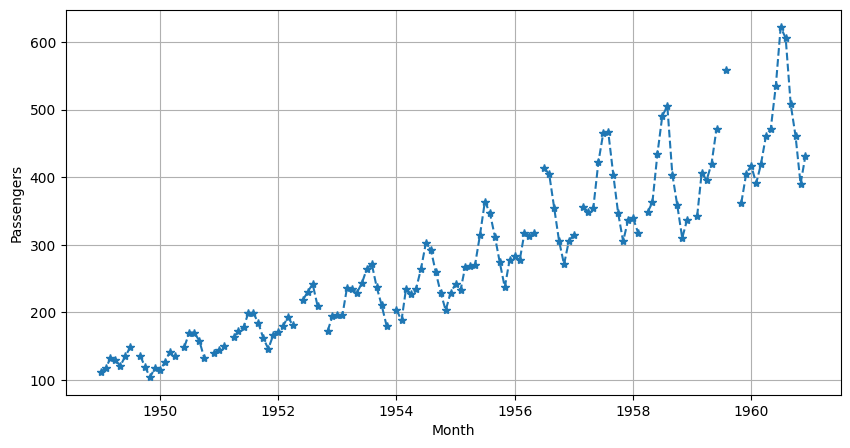

In [89]:
# Upsample
df_daily = df_copy.resample('D').mean()
df_daily
plt.figure(figsize=(10,5))
plt.plot(df_copy.index, df_copy["Passengers"], "--", marker = "*")
plt.grid()
plt.xlabel("Month")
plt.ylabel("Passengers")
# plt.figure(figsize=(10, 4))
# plt.plot(df_daily,  )